In [29]:
import os
import yaml
from matplotlib import pyplot as plt

path = r"/home/foresti/Score-Entropy-Discrete-Diffusion/evaluate/outputs/2025-01-28/infosedd.infosedd.InfoSEDD"
results = []
temperatures = []
current_t = 0

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("results.yaml"):
            with open(os.path.join(root, file), 'r') as stream:
                try:
                    data = yaml.safe_load(stream)
                    h = data['entropy']['mean']['entropy']
                    results.append(h)
                except yaml.YAMLError as exc:
                    print(exc)
        if file.endswith("setup.yaml"):
            with open(os.path.join(root, file), 'r') as stream:
                try:
                    data = yaml.safe_load(stream)
                    if 'temperature' in data['estimator']['args'].keys():
                        t = data['estimator']['args']['temperature']
                        t = float(t[:-4])
                    else:
                        t = None
                    temperatures.append(t)
                except yaml.YAMLError as exc:
                    print(exc)

print(temperatures)
print(results)

final_results = list(zip(temperatures, results))
final_results = list(filter(lambda x: x[0] is not None, final_results))
final_results = list(map(lambda x: (x[0], x[1]/400), final_results))

print(final_results)

[None, 3.0, 3.2, 1.4, 2.1, 3.5, 1.7, 2.2, 1.5, 2.5, 3.8, 2.7, 3.1, 3.4, 2.8, 3.3, 4.0, 1.0, 2.6, 1.6, 1.9, 2.9, 1.1, 1.3, 3.6]
[235.5818548289586, 235.5818548289586, 244.0628701945592, 12.322224412088474, 83.83229321396837, 253.84694869530688, 30.95693121445666, 108.6681012126256, 16.520590409402928, 191.61224930680282, 261.1992553788472, 216.02528645432483, 240.2191590930272, 251.4913497420598, 224.12763706696518, 248.21910275185593, 263.2988079320241, 7.087678467874639, 205.442620335703, 22.911720154886325, 51.9716875468541, 230.72362069428453, 7.0431588298130805, 8.914639298563088, 256.5176569167424]
[(3.0, 0.5889546370723965), (3.2, 0.610157175486398), (1.4, 0.030805561030221185), (2.1, 0.20958073303492092), (3.5, 0.6346173717382672), (1.7, 0.07739232803614166), (2.2, 0.271670253031564), (1.5, 0.04130147602350732), (2.5, 0.47903062326700707), (3.8, 0.6529981384471181), (2.7, 0.5400632161358121), (3.1, 0.600547897732568), (3.4, 0.6287283743551495), (2.8, 0.560319092667413), (3.3, 0.

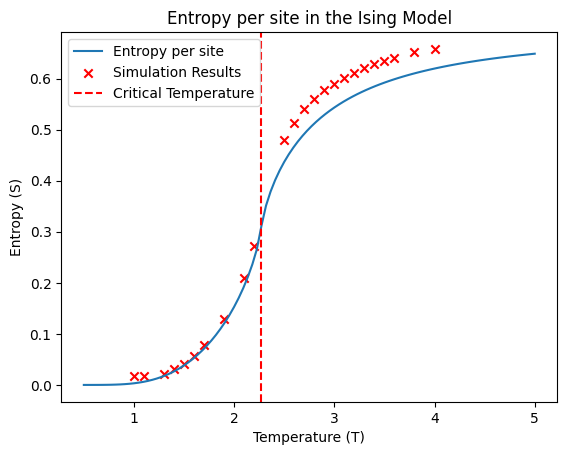

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Define constants
E1 = 1  # Horizontal interaction strength
E2 = 1  # Vertical interaction strength
kB = 1  # Boltzmann constant (set to 1 for simplicity)

# Define the free energy function
def free_energy(T):
    beta = 1 / (kB * T)

    # Integrand for the double integral
    def integrand(theta1, theta2):
        return np.log(np.cosh(2 * beta * E1) * np.cosh(2 * beta * E2) -
                      np.sinh(2 * beta * E1) * np.cos(theta1) -
                      np.sinh(2 * beta * E2) * np.cos(theta2))

    # Compute the double integral
    integral, _ = dblquad(integrand, 0, 2 * np.pi, lambda _: 0, lambda _: 2 * np.pi)

    # Compute free energy
    F = -beta**-1 * (np.log(2) + (1 / (2 * (2 * np.pi)**2)) * integral)
    return F

# Compute entropy S = -dF/dT numerically
def entropy(T):
    dT = 1e-4  # Small perturbation for numerical derivative
    return -(free_energy(T + dT) - free_energy(T - dT)) / (2 * dT)

# Temperature range
T_values = np.linspace(0.5, 5, 100)
S_values = np.array([entropy(T) for T in T_values])

# Plot results
plt.plot(T_values, S_values, label="Entropy per site")
plt.scatter([x[0] for x in final_results], [x[1] for x in final_results], marker='x', color='r', label="Simulation Results")
plt.axvline(2 / np.log(np.sqrt(2) + 1), color='r', linestyle='--', label="Critical Temperature")
plt.xlabel("Temperature (T)")
plt.ylabel("Entropy (S)")
plt.title("Entropy per site in the Ising Model")
plt.legend()
# plt.show()
plt.savefig("entropy.eps")